<a href="https://colab.research.google.com/github/marinapor/Mis-tareas/blob/master/ProyectoFinalMarina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROYECTO FINAL CURSO CIENCIA DE DATOS.
Presenta: Marina Portillo Rangel.
INTRODUCCIÓN.
El presente trabajo esta enfocado a la realización de un modelo predictivo a fin de disminuir los índices de reprobación en la materia de Matemáticas a nivel secundaria (High school).
La razón de poque me enfoqué en este proyecto es porque en todos los niveles educativos nos enfrentamos a el gran reto de lograr que los índices de reprobación de la materia disminuyan de manera eficiente, siendo que la matemática es fundamental para el estudio de cualquier carrera profesional.
A nivel de educación media superior , en paises de Europa, como España o Portugal se tiene un indice de alumnos reprobados en la materia del 5%, mientras que en México tenemos que el 70% de los alumnos de educación básica y media básica han reprobado alguna vez dicha materia.
La prueba PISA, que se aplica cada tres años, ha revelado que si el puntaje en otros paises como España es bajo, en Chile y Uruguay se observa un puntaje inferior por 20 y 60 puntos respectivamente, mientras que México reprueba con 70 puntos debajo de España.
Con resultados tan pobres en Matemáticas y Ciencias es de partícular interés buscar las causas de tan lamentables resultados. En diversos estudios basados en encuentas a estudiantes han revelado que las principales causas se deben a la falta de interés por la materia ya que a nivel mundial el alumno la considera sumamente difícil, abstracta y sin ninguna aplicación práctica a sus intereses. Si a ello aunamos que la manera en que la materia se imparte ha venido siendo la misma casí en su totalidad por espacio de un siglo, el resultado es una total falta de interés y hábitos de estudio. 
En el presente trabajo se usa una base de datos tomados de la platoforma de Kaggle sobre un grupo de estudiantes de dos escuelas secundarias de Portugal en donde se analizan diferentes condiciones socio económicas, así como de hábitos de estudio de este grupo de jóvenes a fin de entender que es aquello que más les afecta en su desempeño y poder tomar acciones antes de que los cursos se reprueben por completo. 
La hipótesis que se quiere probar es que las causas de reprobación son los malos hábitos de estudio conjuntamente con el poco tiempo que se dedica a la materia fuera del aula y el desapego de los propios padres de familia.

In [0]:
#Importamos las librerias correspondientes para el análisis
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import io

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures


from scipy.optimize import curve_fit
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

sns.set_style('whitegrid')

In [0]:
#Aquí se carga el data set de trabajo
from google.colab import files
uploaded = files.upload()


Saving student-mat.csv to student-mat.csv


In [0]:
df = pd.read_csv("student-mat.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

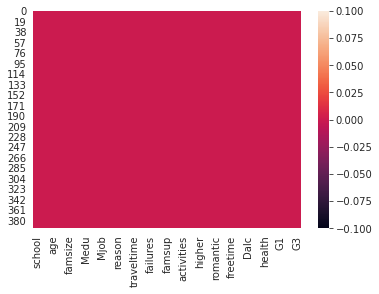

In [0]:
#Voy a hacer un análisis de los datos que tengo, de que tipo son, cuantos son y si hay espacios vacíos
df.info()
df.columns
rows = len(df)
df.isnull().sum()
sns.heatmap(df.isnull())

A partir de ahora voy a convertir variables tales como sexo, edad dirección, famsise, Pstatus, Mjob, Fjob y guardian en variables numéricas a fin de poder estudiar su relación con la calificación del alumno.

In [0]:
df["Medu"].astype("float")
df["Fedu"].astype("float")
df["studytime"].astype("float")
df["Medu"].dtype , df["Fedu"].dtype, df["studytime"].dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

In [0]:
labelencoder= LabelEncoder()
df["school"] = labelencoder.fit_transform(df['school'])
df["sex"] = labelencoder.fit_transform(df['sex'])
df["age"] = labelencoder.fit_transform(df['age'])
df["address"] = labelencoder.fit_transform(df['address'])
df["famsize"] = labelencoder.fit_transform(df['famsize'])
df["Pstatus"] = labelencoder.fit_transform(df['Pstatus'])
df["Mjob"] = labelencoder.fit_transform(df['Mjob'])
df["Fjob"] = labelencoder.fit_transform(df['Fjob'])
df["guardian"] = labelencoder.fit_transform(df['guardian'])
df["activities"]=labelencoder.fit_transform(df["activities"])
df["nursery"]= labelencoder.fit_transform(df["nursery"])
df["internet"]= labelencoder.fit_transform(df["internet"])
df["higher"]= labelencoder.fit_transform(df["higher"])
df["romantic"]= labelencoder.fit_transform(df["romantic"])
df["paid"]= labelencoder.fit_transform(df["paid"])
df["schoolsup"]= labelencoder.fit_transform(df["schoolsup"])
df["famsup"]= labelencoder.fit_transform(df["famsup"])
df["reason"]= labelencoder.fit_transform(df["reason"])

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,3,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,2,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,0,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,0,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,1,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [0]:
# Vuelvo a checar mis datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

In [0]:
df.describe()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,1.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,1.255696,0.853165,1.448101,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,1.208236,0.536684,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


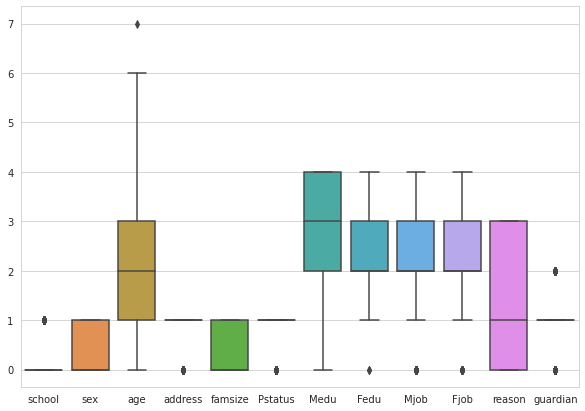

In [0]:
sns.boxplot(data=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]])
plt.rcParams["figure.figsize"]=[10,7]

Esto me permite ver que en aquellas variables que no son binarias como el sexo, dirección, escuela, tamaño de la familia y estatus de los padres, son condiciones más o menos homogéneas, esdecir, la mayoría de los padres terminan la secundaria, la madre trabaja, la madre es la encargada de la casa y la mayoría proviene de hogares con padres que viven juntos. En donde se ve una mayor diversidad en los datos es en la razón por la que se escoge una escuela u otra que pueden ser muy diversas.

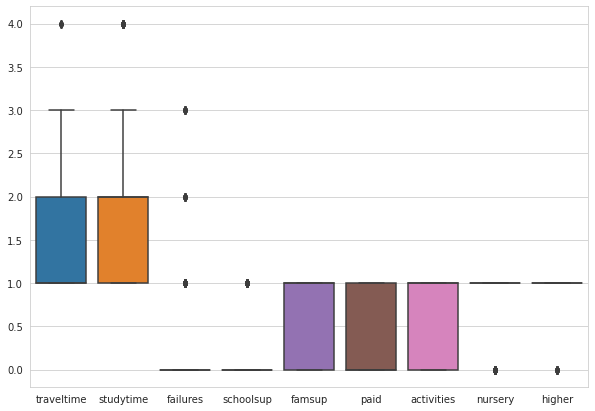

In [0]:
sns.boxplot(data=df.iloc[:,12:21])
plt.rcParams["figure.figsize"]=[15,10]

Son alumnos que reciben clases particulares de matemáticas en su mayoría y tienen en su mayoría interés en seguir estudiando una carrera. Habitos de estudio similares.

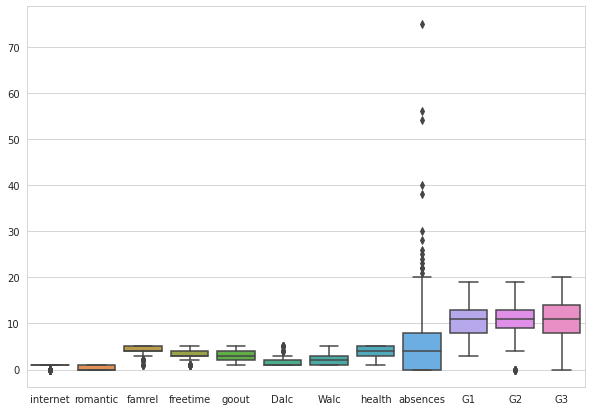

In [0]:
sns.boxplot(data=df.iloc[:,21:33])
plt.rcParams["figure.figsize"]=[20,15]

Veo que las calificaciones de los dos parciales practicamente se repiten, es decir, si desde que se aplica el primer parcial se toman medidas en cuanto a los hábitos y condiciones socio económicas se podría reducir el número de reprobados.
Los datos nos muestran condiciones y habitos similares en cuanto a consumo de alcohol, tiempo de ocio y condiciones de salud, es más variado en cuanto a relaciones familiares y faltas durante el semestre.

Voy a estudiar las columnas de cada uno de los parciales por separado. Quiero saber como se comportan, sus medidas de tendencia central, que tan diferentes son el primer y segundo parcial y que tan dispersas estan las calificaciones de cada parcial.

Mean: 10.713924050632912
Median: 11.0
Std Dev: 3.761504659556034
Skew: -0.4316453889925487
Kurtosis: 0.6277056433602413
Percentil 25: 9.0
Percentil 50: 11.0
Percentil 75: 13.0


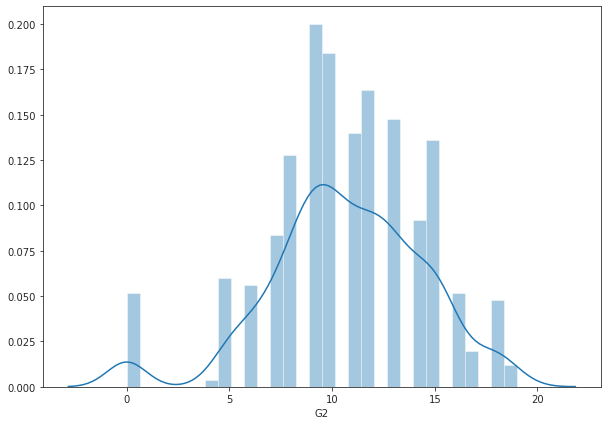

In [0]:

mean = df['G2'].mean()
median = df['G2'].median()
std = df['G2'].std()
skew = df['G2'].skew()
kurt = df['G2'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(df['G2'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(df['G2'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(df['G2'], 75)
print("Percentil 75:", per75)
sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 5})
plt.figure(figsize=(10,7))
sns.distplot(df['G2'], bins=30)


Mean: 10.90886075949367
Median: 11.0
Std Dev: 3.3191946715076686
Skew: 0.24061324337096948
Kurtosis: -0.6938295024333452
Percentil 25: 8.0
Percentil 50: 11.0
Percentil 75: 13.0


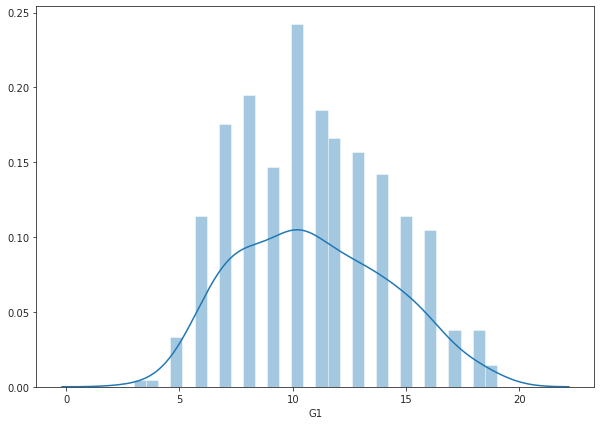

In [0]:

mean = df['G1'].mean()
median = df['G1'].median()
std = df['G1'].std()
skew = df['G1'].skew()
kurt = df['G1'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(df['G1'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(df['G1'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(df['G1'], 75)
print("Percentil 75:", per75)
sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 5})
plt.figure(figsize=(10,7))
sns.distplot(df['G1'], bins=30)


Mean: 10.415189873417722
Median: 11.0
Std Dev: 4.5814426109978434
Skew: -0.7326723530443435
Kurtosis: 0.4034208131242458
Percentil 25: 8.0
Percentil 50: 11.0
Percentil 75: 14.0


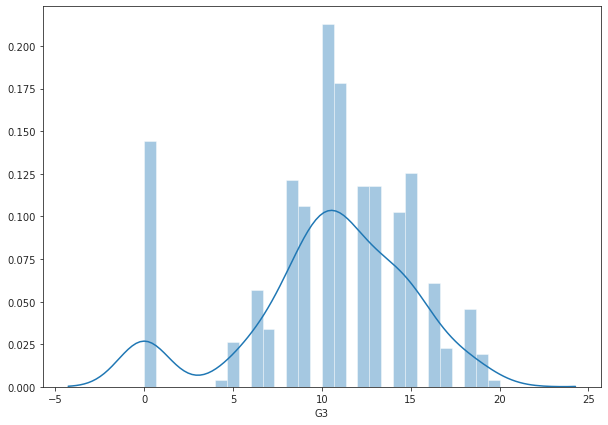

In [0]:
mean = df['G3'].mean()
median = df['G3'].median()
std = df['G3'].std()
skew = df['G3'].skew()
kurt = df['G3'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(df['G3'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(df['G3'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(df['G3'], 75)
print("Percentil 75:", per75)
sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 5})
plt.figure(figsize=(10,7))
sns.distplot(df['G3'], bins=30)


In [0]:
print (df["G1"].value_counts())
print ( len (df.loc[df["G1"]>12]) )
print (df["G2"].value_counts())
print(len (df.loc[df["G2"]>12]))
print (df["G3"].value_counts())
print(len (df.loc[df["G2"]>12]))

aprobados1 = len (df.loc[df["G1"]>12]) / len(df)
aprobados2 = len (df.loc[df["G2"]>12]) / len(df)
aprobados_curso = len (df.loc[df["G3"]>12]) / len(df)

print ("El porcentaje de apobados en el primer parcial es: ", aprobados1*100)
print ("El porcentaje de apobados en el segundo parcial es: ", aprobados2*100)
print ("El porcentaje de apobados en el curso es: ", aprobados_curso*100)

A groso modo puedo decir que si un alumno pasa el primer parcial, tiene mas probabilidades de pasar el segundo, y quienes aprueban los dos parciales son los mismos que aprueban el curso.

Mean: 1.2632911392405064
Median: 1.0
Std Dev: 1.5252674904949906
Skew: 3.2456877152675543
Kurtosis: 15.669291872931787
Percentil 25: 0.0
Percentil 50: 1.0
Percentil 75: 2.0


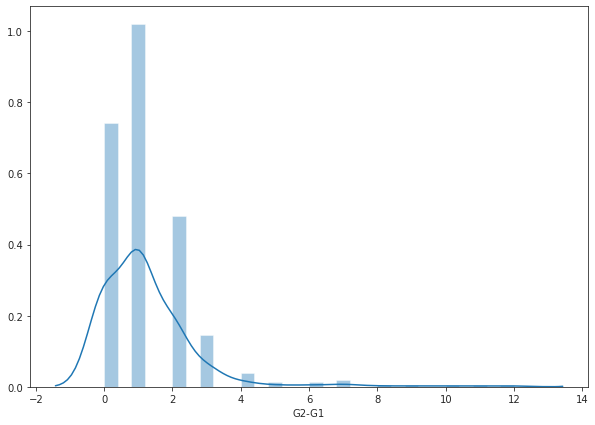

In [0]:
#Que tan diferentes son las calificaciones del primero y segundo parcial?
df["G2-G1"] = df["G2"]- df["G1"]
df["G2-G1"]= df["G2-G1"].abs()
mean = df['G2-G1'].mean()
median = df['G2-G1'].median()
std = df['G2-G1'].std()
skew = df['G2-G1'].skew()
kurt = df['G2-G1'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(df['G2-G1'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(df['G2-G1'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(df['G2-G1'], 75)
print("Percentil 75:", per75)
sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 5})


plt.figure(figsize=(10,7))
sns.distplot(df['G2-G1'], bins=30)


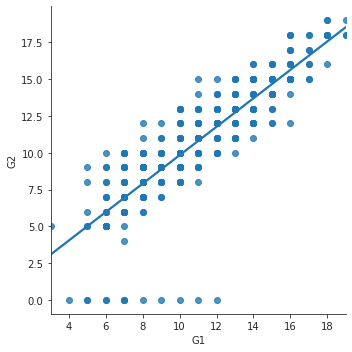

In [0]:
sns.lmplot('G1','G2',data=df,ci=False)

In [0]:
#Ajuste, ¿en verdad estan muy relacionadas las dos calificaciones?
x1 = df['G1']
y = df["G2"]

In [0]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1042.
Date:                Fri, 24 Apr 2020   Prob (F-statistic):          1.44e-112
Time:                        01:01:50   Log-Likelihood:                -827.52
No. Observations:                 395   AIC:                             1659.
Df Residuals:                     393   BIC:                             1667.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1796      0.341      0.526      0.599      -0.491       0.850
G1             0.9657      0.030     32.278      0.000       0.907       1.024
==============================================================================
Omnibus:                      195.644   Durbin-Watson:                   1.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1446.712
Skew:                          -1.975   Prob(JB):                         0.00
Kurtosis:                      11.503   Cond. No.                         39.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

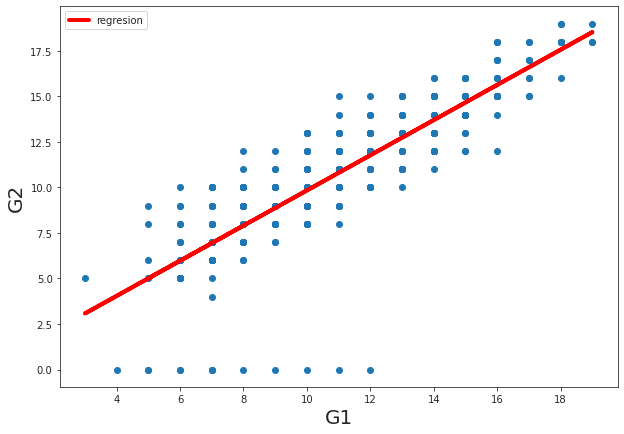

In [0]:
#Reviso mi ajuste
plt.figure(figsize=(10,7))
plt.scatter(x1,y)
g2_predic = x1*0.9657+0.1796	
plt.plot(x1,g2_predic, lw=4, c='red', label = 'regresion')
plt.xlabel('G1', fontsize = 20)
plt.ylabel('G2', fontsize = 20)
plt.legend()
plt.show()


In [0]:
#Quiero probar la hipótesis de que las calificaciones G1 y G2, son practicamente iguales
t ,p= st.ttest_ind(df["G1"], df["G2"], equal_var = False)
print("t_value= ",t)
print("p_value= ",p)

t_value=  0.7722987557628348
p_value=  0.4401726477415321


Se puede concluír que en efecto no son iguales pero si están correlacionadas fuertemente.

Análisis de la correlación entre la calificación del primer parcial con la calificación final.

Mean: 1.7848101265822784
Median: 1.0
Std Dev: 2.1637934708905973
Skew: 2.2465420933652855
Kurtosis: 5.221774327366952
Percentil 25: 1.0
Percentil 50: 1.0
Percentil 75: 2.0


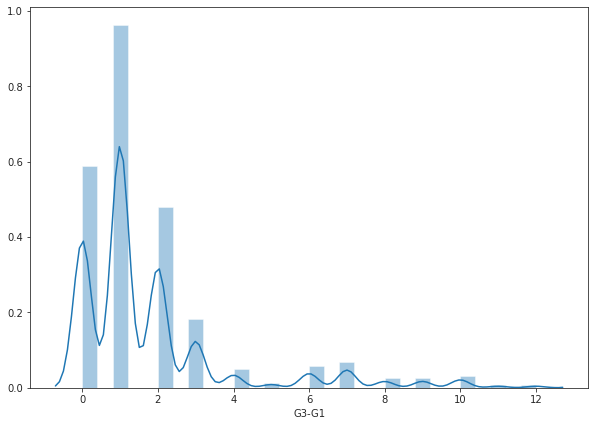

In [0]:
df["G3-G1"] = df["G3"]- df["G1"]
df["G3-G1"]= df["G3-G1"].abs()
mean = df['G3-G1'].mean()
median = df['G3-G1'].median()
std = df['G3-G1'].std()
skew = df['G3-G1'].skew()
kurt = df['G3-G1'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(df['G3-G1'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(df['G3-G1'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(df['G3-G1'], 75)
print("Percentil 75:", per75)
sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 5})


plt.figure(figsize=(10,7))
sns.distplot(df['G3-G1'], bins=30)


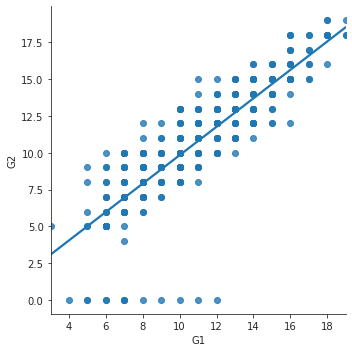

In [0]:
sns.lmplot('G1','G2',data=df,ci=False)


In [0]:
x1 = df['G1']
y = df["G3"]

In [0]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     705.8
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           9.00e-90
Time:                        01:02:58   Log-Likelihood:                -958.11
No. Observations:                 395   AIC:                             1920.
Df Residuals:                     393   BIC:                             1928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6528      0.475     -3.481      0.001      -2.586      -0.719
G1             1.1063      0.042     26.568      0.000       1.024       1.188
==============================================================================
Omnibus:                      116.350   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.539
Skew:                          -1.462   Prob(JB):                     4.44e-62
Kurtosis:                       5.935   Cond. No.                         39.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

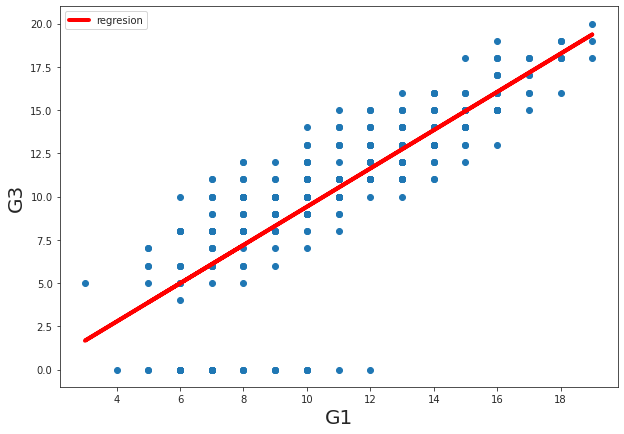

In [0]:
#Reviso mi ajuste
plt.figure(figsize=(10,7))
plt.scatter(x1,y)
g3_predic = x1*1.1063 - 1.65280
plt.plot(x1,g3_predic, lw=4, c='red', label = 'regresion')
plt.xlabel('G1', fontsize = 20)
plt.ylabel('G3', fontsize = 20)
plt.legend()
plt.show()


Análisis de la correlación entre el segundo parcial y la calificación final

Mean: 0.9620253164556962
Median: 1.0
Std Dev: 1.7643036760394688
Skew: 3.263011894144064
Kurtosis: 11.123004883170754
Percentil 25: 0.0
Percentil 50: 1.0
Percentil 75: 1.0


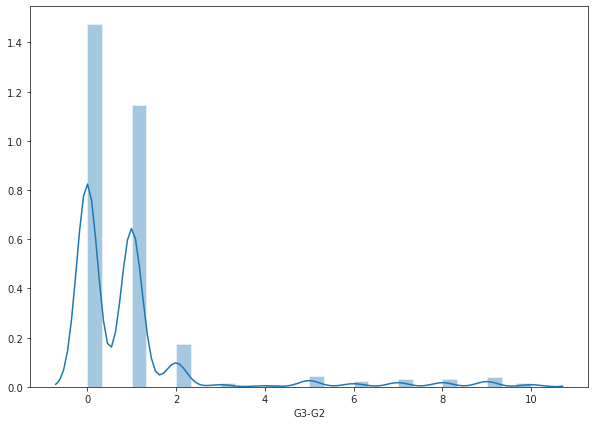

In [0]:
df["G3-G2"] = df["G3"]- df["G2"]
df["G3-G2"]= df["G3-G2"].abs()
mean = df['G3-G2'].mean()
median = df['G3-G2'].median()
std = df['G3-G2'].std()
skew = df['G3-G2'].skew()
kurt = df['G3-G2'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(df['G3-G2'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(df['G3-G2'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(df['G3-G2'], 75)
print("Percentil 75:", per75)
sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 5})


plt.figure(figsize=(10,7))
sns.distplot(df['G3-G2'], bins=30)


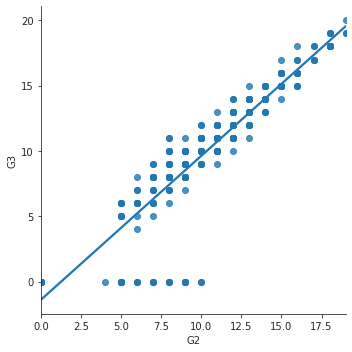

In [0]:
sns.lmplot('G2','G3',data=df,ci=False)
plt.show()

In [0]:
x2 = df['G2']
y = df["G3"]


In [0]:
x = sm.add_constant(x2)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1776.
Date:                Fri, 24 Apr 2020   Prob (F-statistic):          7.63e-148
Time:                        01:02:58   Log-Likelihood:                -823.83
No. Observations:                 395   AIC:                             1652.
Df Residuals:                     393   BIC:                             1660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3928      0.297     -4.690      0.000      -1.977      -0.809
G2             1.1021      0.026     42.139      0.000       1.051       1.154
==============================================================================
Omnibus:                      246.646   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.620
Skew:                          -2.699   Prob(JB):                         0.00
Kurtosis:                      11.877   Cond. No.                         34.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

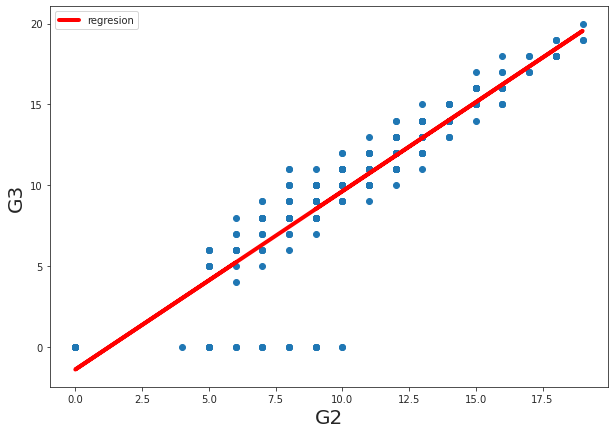

In [0]:
#Reviso mi ajuste
plt.figure(figsize=(10,7))
plt.scatter(x2,y)
g3_predic = x2*1.1021 - 1.3928
plt.plot(x2,g3_predic, lw=4, c='red', label = 'regresion')
plt.xlabel('G2', fontsize = 20)
plt.ylabel('G3', fontsize = 20)
plt.legend()
plt.show()


In [0]:
#Quiero probar la hipótesis de que las calificaciones G2 y G3, son practicamente iguales
t ,p= st.ttest_ind(df["G2"], df["G3"], equal_var = False)
print("t_value= ",t)
print("p_value= ",p)

t_value=  1.0015938335391217
p_value=  0.31685890997593924


En efecto se puede incluso decir que la calificación del segundo parcial es la misma que tendrán en el curso con un 82% de exactitud.

In [0]:
#Si un alumno pasa, es decir obtiene mínimo 12 puntos en el primer parcial, cual es la calificación que sacaria en el segundo parcial?
print ("Existe un 72% de probabilidad de que la calificación del segundo parcial sea: ", float( 12*0.9657+0.1796))
#Si un alumno saca un mínimo de 13 puntos en el primer parcial alcanzaria a pasar el segundo parcial con:
print ("Existe un 72% de probabilidad de que la calificación del segundo parcial sea: ", float( 13*0.9657+0.1796))
#Si se obtiene apenas 12 en el primer parcial, hay un 64% de probabilidad de que no se apruebe el curso
print ("Existe un 64% de probabilidad de que la calificación del curso sea: ", float( 12*1.1063 - 1.6528))
#Si se obtiene un mínimo de 12 puntos en el segundo parcial, se tiene un 82% de probabilidad de pasar el curso
print ("Existe un 82% de probabilidad de que la calificación del curso sea: ", float( 12*1.1021 - 1.3928))
#Se necesita un mínimo de 13 puntos en el segundo parcial, para tener un 82% de probabilidad de pasar el curso
print ("Existe un 82% de probabilidad de que si pasó el segundo parcial la calificación del curso sea: ", float( 13*1.1021 - 1.3928))

Existe un 72% de probabilidad de que la calificación del segundo parcial sea:  11.768
Existe un 72% de probabilidad de que la calificación del segundo parcial sea:  12.7337
Existe un 64% de probabilidad de que la calificación del curso sea:  11.622800000000002
Existe un 82% de probabilidad de que la calificación del curso sea:  11.832400000000002
Existe un 82% de probabilidad de que si pasó el segundo parcial la calificación del curso sea:  12.934500000000002


Factores que pueden influir en las calificaciones de los alumnos.
Ahora pretendo comprobar la hipótesis inicial de que las condiciones económicas y sociales tales como el número de miembros de la familia, hábitos en el consumo de alcohol y hábitos de estudio, son los que determinan el nivel de aprovechamiento en la materia.

(0.0, 33.0)

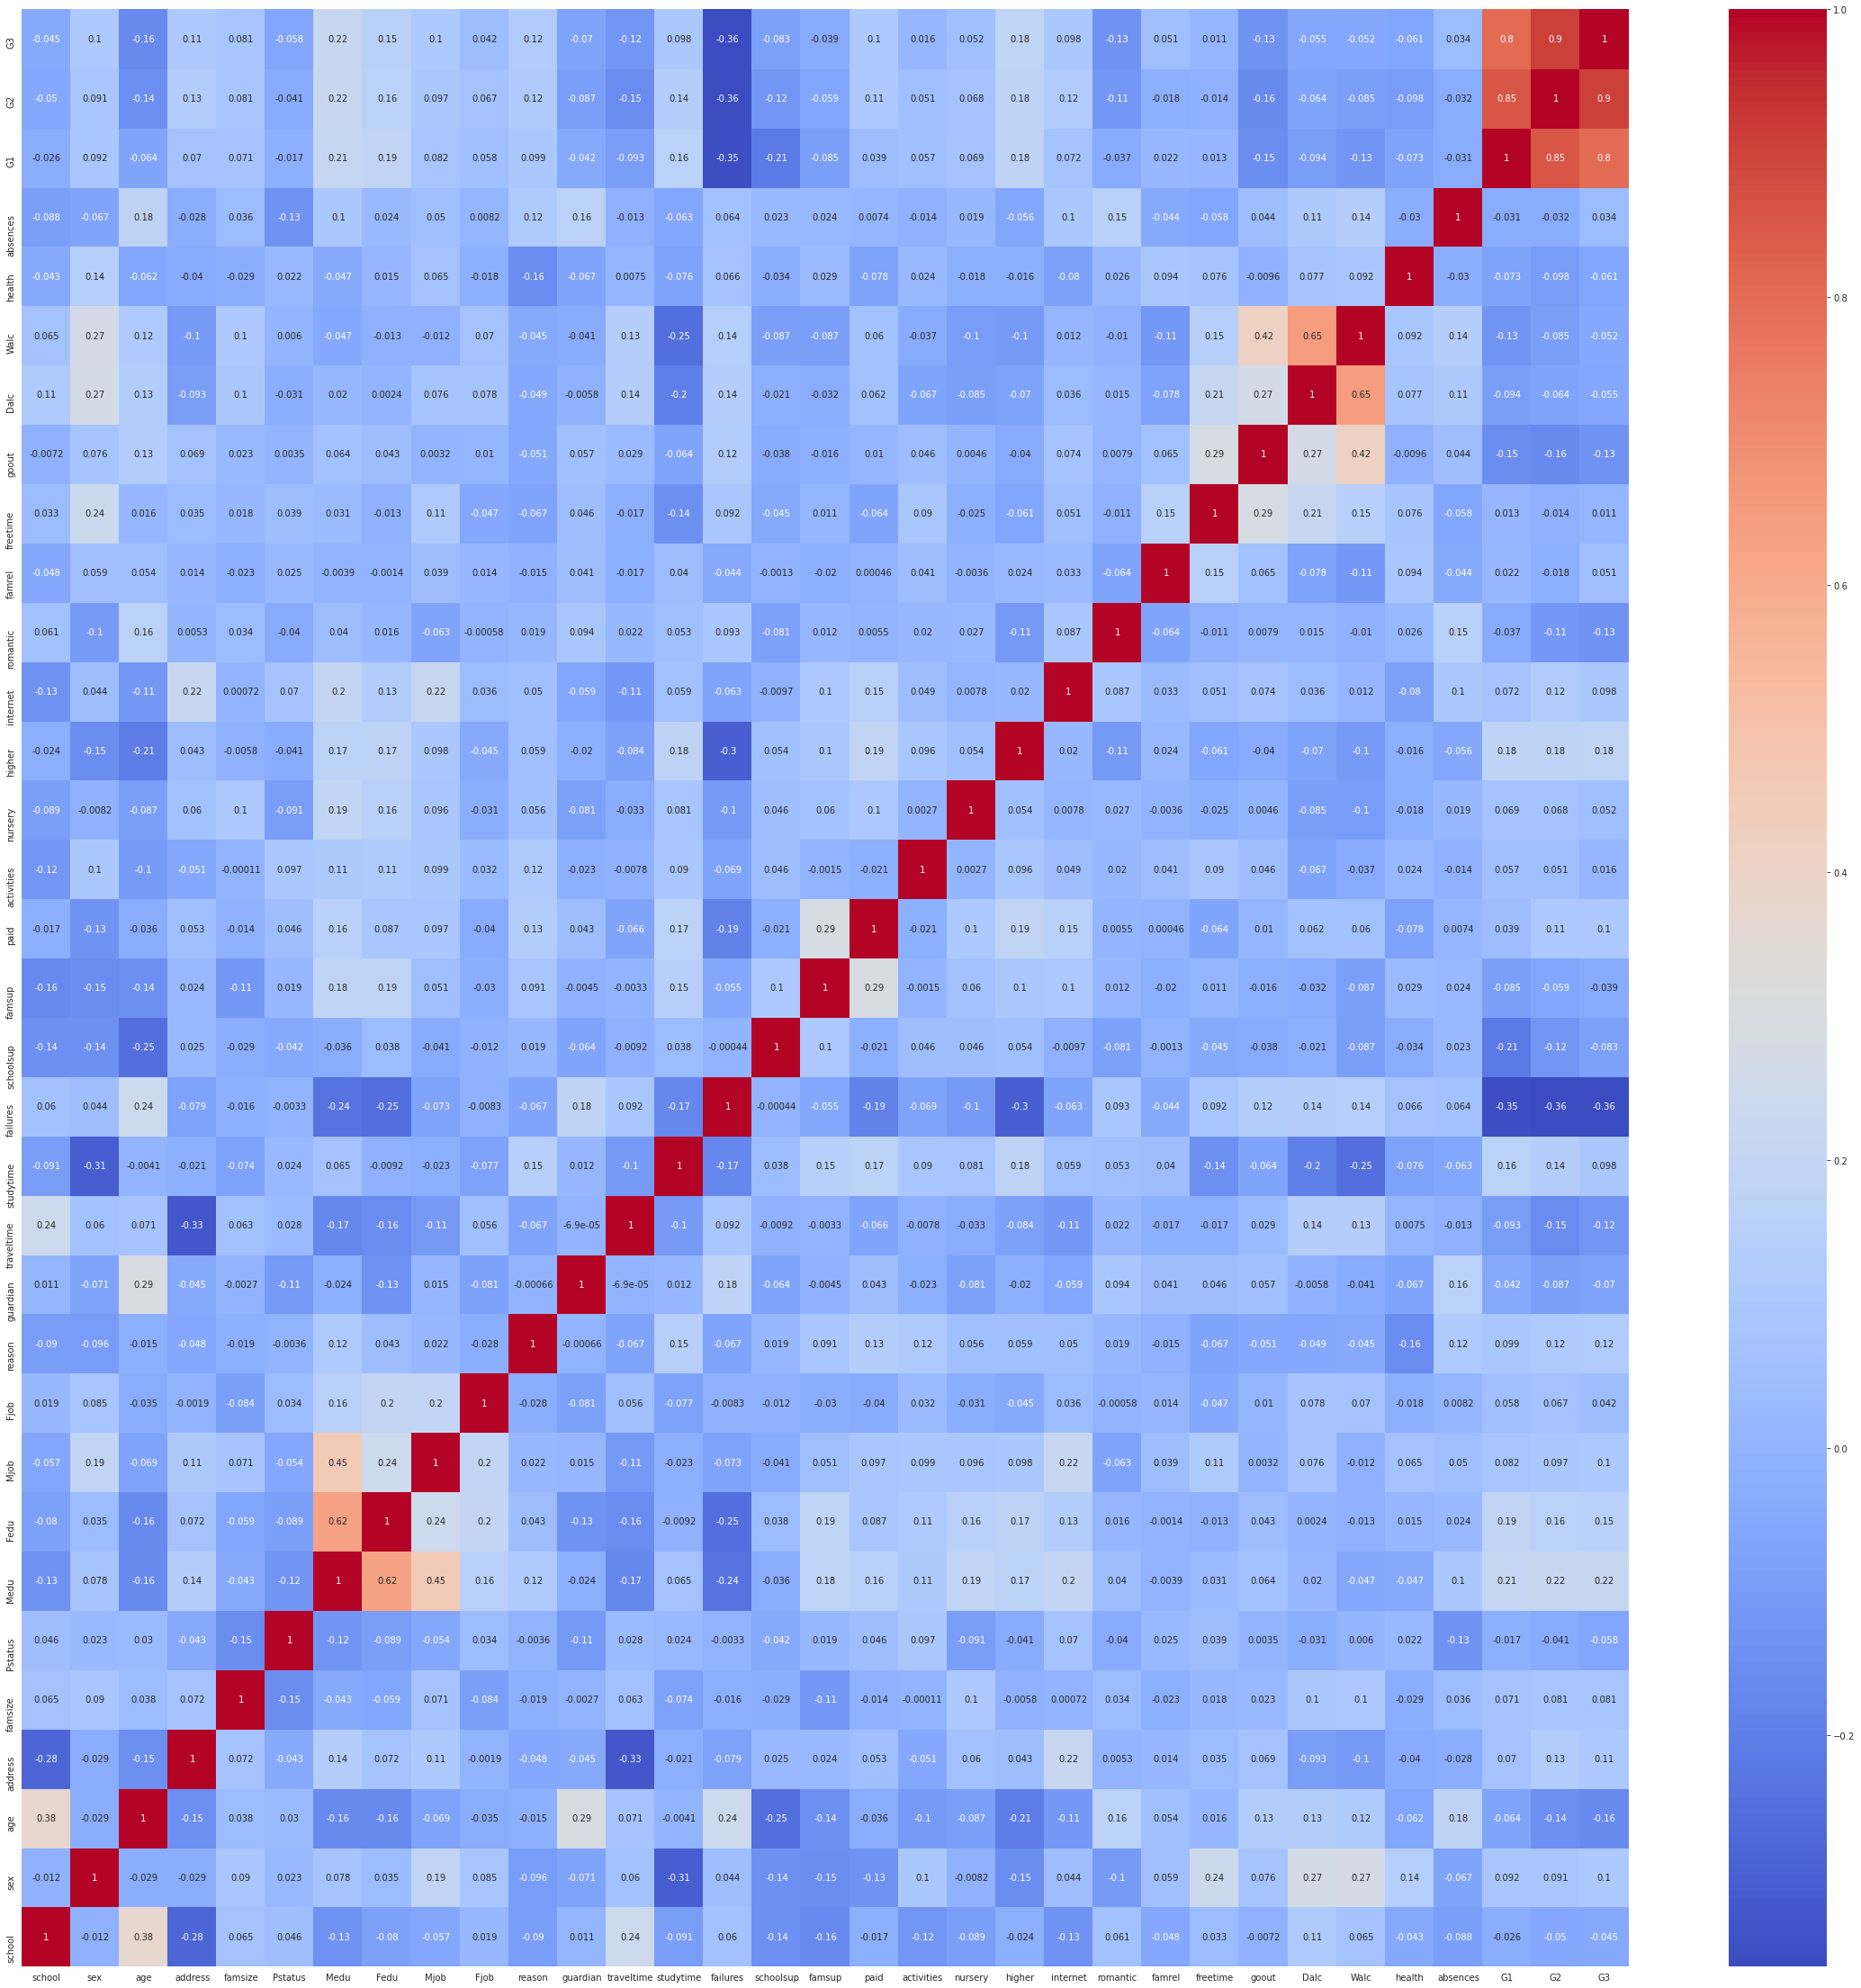

In [0]:
fig, ax=plt.subplots(figsize=(40,40))
ax= sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
ax.set_ylim([0,33])

ax.set_xlim([0,33])

Veo que los factores más relevantes son: Medu, Fedu, traveltime, studytime, failures, higher, internet, romantic, famrel, goout, Dalc, Walc, absences, G1 y G2 son los que pudieran ser relevantes e influir en la predicción de la calificación final del alumno, G3.

Voy a tratar de medir la importancia de los factores más relevantes en las calificaciones del alumno revisando el poder predictivo de cada variable.

SpearmanrResult(correlation=0.2250358528745645, pvalue=6.290448010609436e-06)


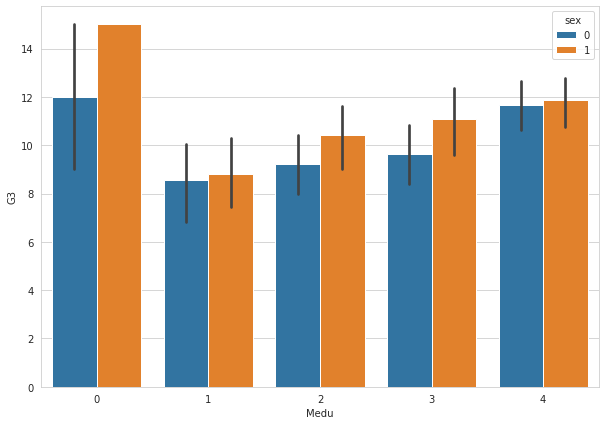

In [0]:
plt.figure(figsize=(10,7))
sns.barplot(df["Medu"], df["G3"], hue= df["sex"], data= df)
print(st.spearmanr(df.Medu,df.G3))
plt.show()

SpearmanrResult(correlation=0.17004900082627797, pvalue=0.0006895636032614371)


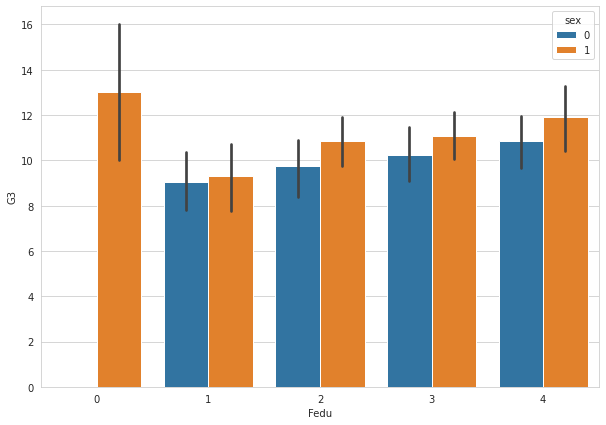

In [0]:
plt.figure(figsize=(10,7))
sns.barplot(df["Fedu"], df["G3"], hue= df["sex"], data= df)
print(st.spearmanr(df.Fedu,df.G3))
plt.show()

In [0]:
X= df[ ["Medu",'Fedu'] ]
y = df["G3"]

In [0]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.802
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           7.01e-05
Time:                        23:43:03   Log-Likelihood:                -1151.5
No. Observations:                 395   AIC:                             2309.
Df Residuals:                     392   BIC:                             2321.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8205      0.648     12.073      0.000       6.547       9.094
Medu           0.8359      0.264      3.168      0.002       0.317       1.355
Fedu           0.1176      0.265      0.443      0.658      -0.404       0.639
==============================================================================
Omnibus:                       34.382   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.826
Skew:                          -0.765   Prob(JB):                     1.36e-09
Kurtosis:                       3.375   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [0]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.coef_

array([0.79433722, 0.10063809])

In [0]:
reg.intercept_

7.993949085296437

In [0]:
reg.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [0]:
coefficients= pd.DataFrame(index=X.columns, data =reg.coef_.T, columns=['Coef.'])
coefficients

,Coef.
Medu,0.794337
Fedu,0.100638


In [0]:
pred = reg.predict(X_test)
residuals= y_test - pred 


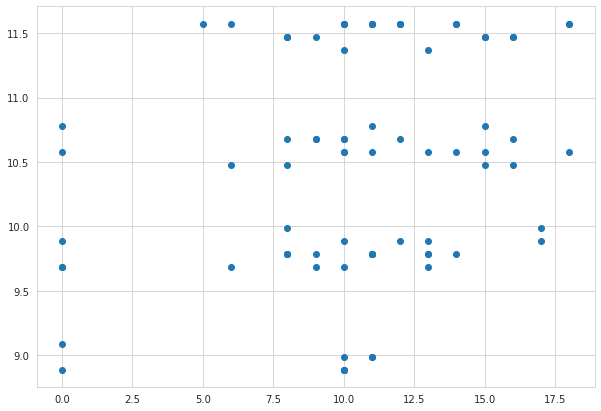

In [0]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,pred,)

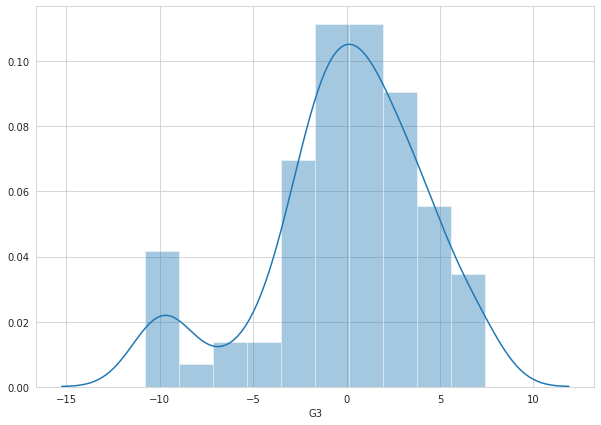

In [0]:
plt.figure(figsize=(10,7))
sns.distplot(residuals,bins=10,)

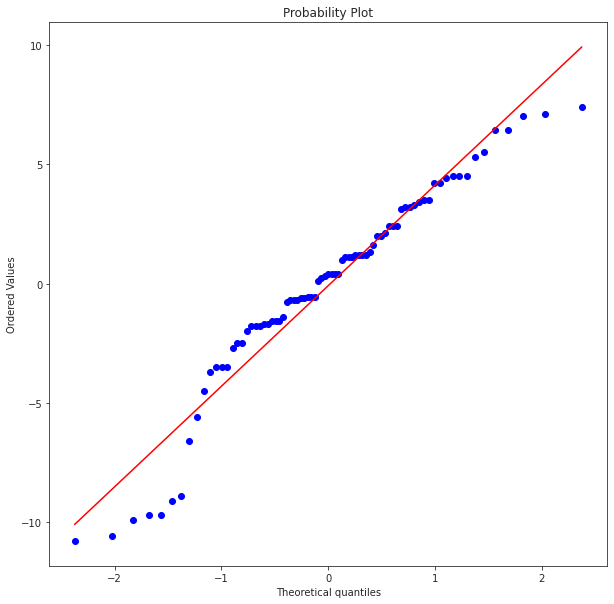

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
st.probplot(residuals,plot=ax,fit=True)
plt.show()

In [0]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [0]:
st.kstest(residuals,'norm')

KstestResult(statistic=0.3097700704563021, pvalue=3.13168084329912e-07)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2: ',adj_r2(X,y) )

MAE: 3.194675486710415
MSE: 17.817569832813835
RMSE: 4.22108633325757
R2:  0.042592517884114445


Por los valores de p, y de MAE, R2, puedo decir que el nivel educativo de los padres influye en la calificación final de los alumnos, pero no es totalmente determinante al grado de poder predecir sus calificaciones en base a ello.

Ahora voy a revisar por separado cada una de las variables que pueden influir en la calificación final del alumno.

SpearmanrResult(correlation=-0.12053038660352437, pvalue=0.016545913756784082)


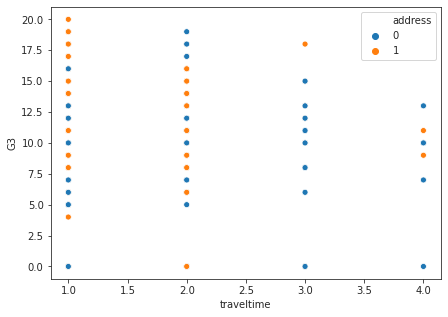

In [0]:
plt.figure(figsize=(7,5))
sns.scatterplot(df.traveltime, df.G3, hue=df.address)
print(st.spearmanr(df.traveltime,df.G3))
plt.show()

SpearmanrResult(correlation=0.10516968678133246, pvalue=0.036673582871214104)


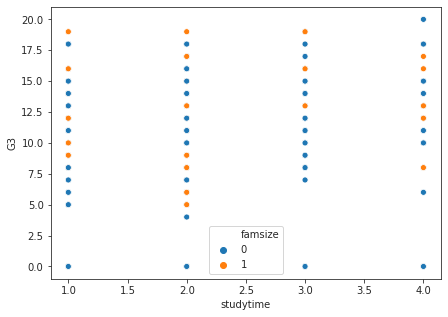

In [0]:
plt.figure(figsize=(7,5))
sns.scatterplot(df.studytime, df.G3, hue=df.famsize)
print(st.spearmanr(df.studytime,df.G3))
plt.show()

SpearmanrResult(correlation=0.10516968678133246, pvalue=0.036673582871214104)


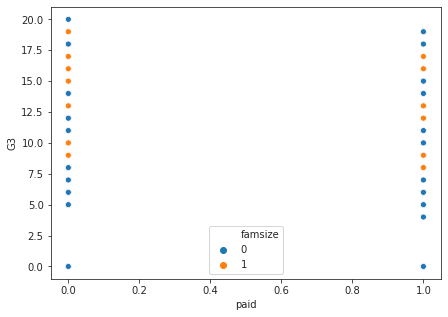

In [0]:
plt.figure(figsize=(7,5))
sns.scatterplot(df.paid, df.G3, hue=df.famsize)
print(st.spearmanr(df.studytime,df.G3))
plt.show()

SpearmanrResult(correlation=-0.361223517700282, pvalue=1.2818799782347257e-13)


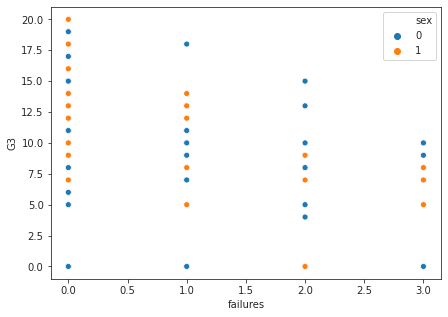

In [0]:
plt.figure(figsize=(7,5))
sns.scatterplot(df.failures, df.G3, hue=df.sex)
print(st.spearmanr(df.failures,df.G3))
plt.show()

SpearmanrResult(correlation=0.10781564360547292, pvalue=0.03217331316146161)


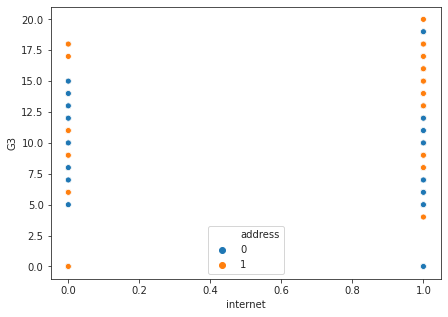

In [0]:
plt.figure(figsize=(7,5))
sns.scatterplot(df.internet, df.G3, hue=df.address)
print(st.spearmanr(df.internet,df.G3))
plt.show()

SpearmanrResult(correlation=0.17241788988098164, pvalue=0.0005780981697163278)


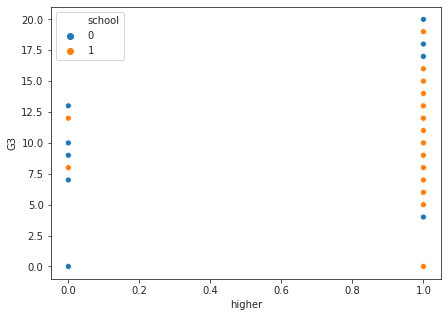

In [0]:
plt.figure(figsize=(7,5))
sns.scatterplot(df.higher, df.G3, hue=df.school)
print(st.spearmanr(df.higher,df.G3))
plt.show()

SpearmanrResult(correlation=-0.09146002016744205, pvalue=0.06940434605481748)


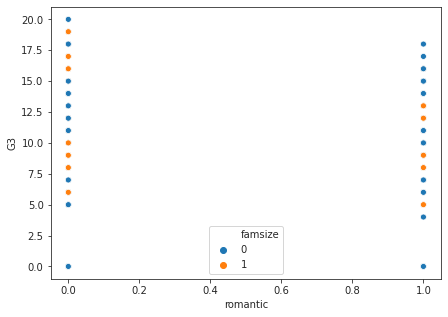

In [0]:
plt.figure(figsize=(7,5))
sns.scatterplot(df.romantic, df.G3, hue=df.famsize)
print(st.spearmanr(df.romantic,df.G3))
plt.show()

SpearmanrResult(correlation=-0.047789506549450154, pvalue=0.34347118660157205)


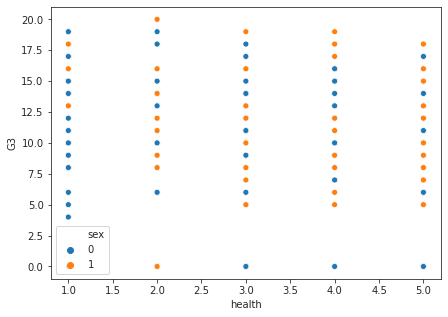

In [0]:
plt.figure(figsize=(7,5))
sns.scatterplot(df.health, df.G3, hue=df.sex)
print(st.spearmanr(df.health,df.G3))
plt.show()

SpearmanrResult(correlation=0.05497687081409259, pvalue=0.27571074655736877)


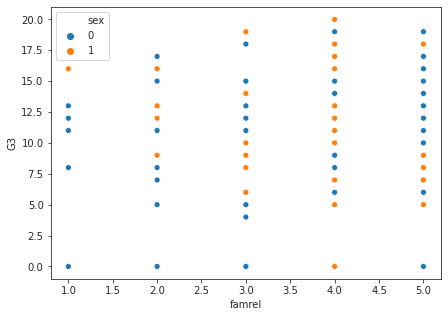

In [0]:
plt.figure(figsize=(7,5))
sns.scatterplot(df.famrel, df.G3, hue=df.sex)
print(st.spearmanr(df.famrel,df.G3))
plt.show()

SpearmanrResult(correlation=-0.1661187496045088, pvalue=0.0009192641404671132)


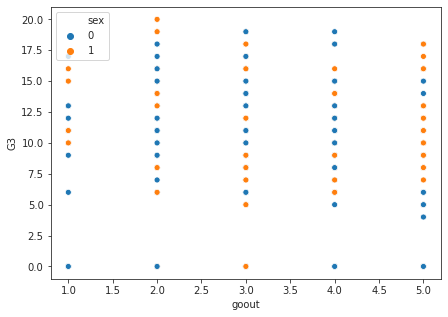

In [0]:
plt.figure(figsize=(7,5))
sns.scatterplot(df.goout, df.G3, hue=df.sex)
print(st.spearmanr(df.goout,df.G3))
plt.show()

SpearmanrResult(correlation=-0.10445859969861528, pvalue=0.037970377961224634)


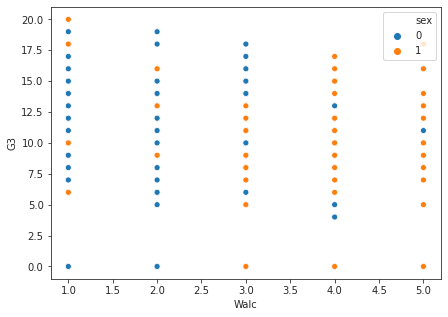

In [0]:
plt.figure(figsize=(7,5))
sns.scatterplot(df.Walc, df.G3, hue=df.sex)
print(st.spearmanr(df.Walc,df.G3))
plt.show()

SpearmanrResult(correlation=0.017730669122425113, pvalue=0.7253626110680622)


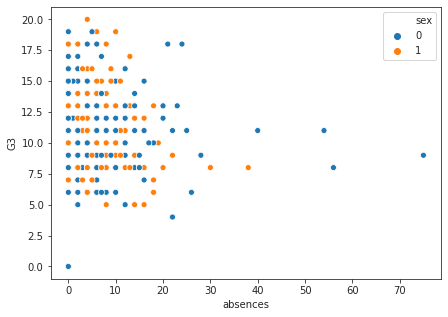

In [0]:
plt.figure(figsize=(7,5))
sns.scatterplot(df.absences, df.G3, hue=df.sex)
print(st.spearmanr(df.absences,df.G3))
plt.show()

Voy a tratar de hacer una regresión lineal múltiple con las variables que me parecen relevantes.

In [0]:
X = df[ ['Medu','Fedu','traveltime','studytime','failures','higher','internet','romantic','famrel','goout','Walc','absences','G1','G2']]
y = df.loc[:, 'G3']

Hago un ajuste por mínimos cuadrados, después de la selección de variables

In [0]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     138.7
Date:                Fri, 24 Apr 2020   Prob (F-statistic):          1.07e-139
Time:                        23:46:28   Log-Likelihood:                -803.66
No. Observations:                 395   AIC:                             1637.
Df Residuals:                     380   BIC:                             1697.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3416      0.871     -3.839      0.000      -5.053      -1.630
Medu           0.1331      0.116      1.152      0.250      -0.094       0.360
Fedu          -0.1254      0.114     -1.096      0.274      -0.350       0.100
traveltime     0.1077      0.142      0.758      0.449      -0.172       0.387
studytime     -0.1517      0.121     -1.252      0.211      -0.390       0.086
failures      -0.2508      0.147     -1.711      0.088      -0.539       0.037
higher         0.3044      0.465      0.655      0.513      -0.610       1.219
internet      -0.1649      0.265     -0.622      0.534      -0.686       0.357
romantic      -0.3435      0.210     -1.636      0.103      -0.756       0.069
famrel         0.3441      0.108      3.179      0.002       0.131       0.557
goout         -0.0062      0.097     -0.064      0.949      -0.197       0.185
Walc           0.0991      0.087      1.141      0.254      -0.072       0.270
absences       0.0393      0.012      3.194      0.002       0.015       0.063
G1             0.1523      0.057      2.696      0.007       0.041       0.263
G2             0.9759      0.051     19.280      0.000       0.876       1.075
==============================================================================
Omnibus:                      216.292   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1310.069
Skew:                          -2.345   Prob(JB):                    3.33e-285
Kurtosis:                      10.589   Cond. No.                         177.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Voy a repetir el ajuste pero con sklearn para poder hacer un entrenamiento y revisar los resíduos.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [0]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.coef_

array([ 0.13227567, -0.06147953,  0.1855704 , -0.22293353,  0.02196384,
        0.2306091 , -0.05308993, -0.33173258,  0.30898892,  0.02459006,
        0.08063418,  0.03194255,  0.17892014,  0.97379387])

In [0]:
reg.intercept_

-3.7328976926613997

In [0]:
reg.score(X_train,y_train)

0.8291481770389721

In [0]:
coefficients = pd.DataFrame(index=X.columns,data=reg.coef_.T,columns=['Coef.'])
coefficients

,Coef.
Medu,0.132276
Fedu,-0.061480
traveltime,0.185570
studytime,-0.222934
failures,0.021964
higher,0.230609
internet,-0.053090
romantic,-0.331733
famrel,0.308989
goout,0.024590


In [0]:
gradehat= reg.predict(X_test)
residuals = y_test - gradehat

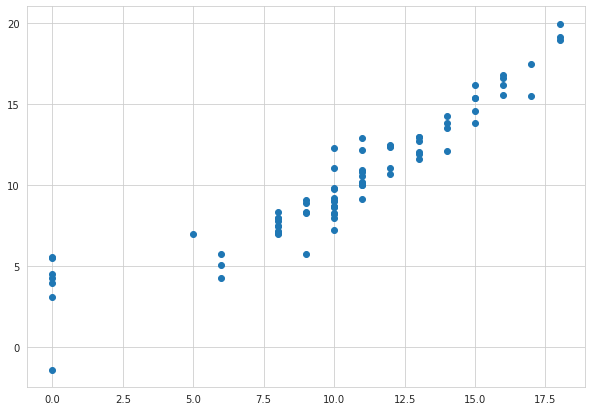

In [0]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,gradehat)

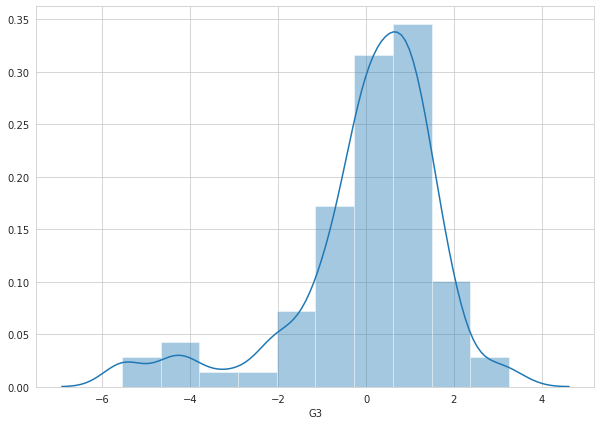

In [0]:
plt.figure(figsize=(10,7))
sns.distplot(residuals,bins=10)

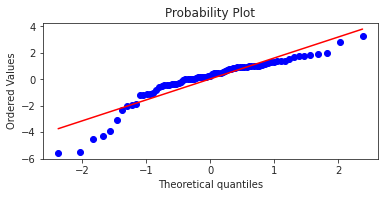

In [0]:
fig, ax = plt.subplots(figsize=(6,2.5))
st.probplot(residuals,plot=ax,fit=True)
plt.show()

In [0]:
st.kstest(residuals,'norm')

KstestResult(statistic=0.18085465070659978, pvalue=0.009854358131011333)

In [0]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, gradehat))
print('MSE:', metrics.mean_squared_error(y_test, gradehat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gradehat)))
print('R2: ',adj_r2(X,y) )

MAE: 1.1782773661579033
MSE: 2.768201778696483
RMSE: 1.6637913867719363
R2:  0.8277602826858739


Voy a repetir el ajuste quitando factores como: 'higher', 'internet', 'romantic', por no ser relevantes para la predicción de la calificación final.

In [0]:
X = df[ ['Medu','Fedu','traveltime','studytime','failures','famrel','goout','Walc','absences','G1','G2']]
y = df.loc[:, 'G3']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [0]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.coef_

array([ 0.1231016 , -0.06861667,  0.18237543, -0.23795573, -0.0241548 ,
        0.32110351,  0.02742489,  0.07719754,  0.02889224,  0.17604551,
        0.97944539])

In [0]:
reg.intercept_

-3.638705195331312

In [0]:
reg.score(X_train,y_train)

0.8279059040527612

In [0]:
coefficients = pd.DataFrame(index=X.columns,data=reg.coef_.T,columns=['Coef.'])
coefficients

,Coef.
Medu,0.123102
Fedu,-0.068617
traveltime,0.182375
studytime,-0.237956
failures,-0.024155
famrel,0.321104
goout,0.027425
Walc,0.077198
absences,0.028892
G1,0.176046


In [0]:
gradehat= reg.predict(X_test)
residuals = y_test - gradehat

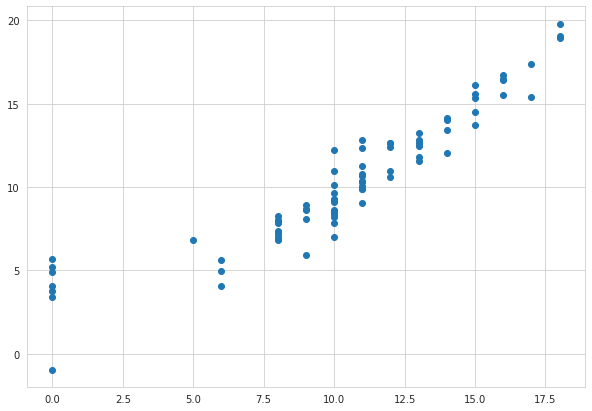

In [0]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,gradehat)

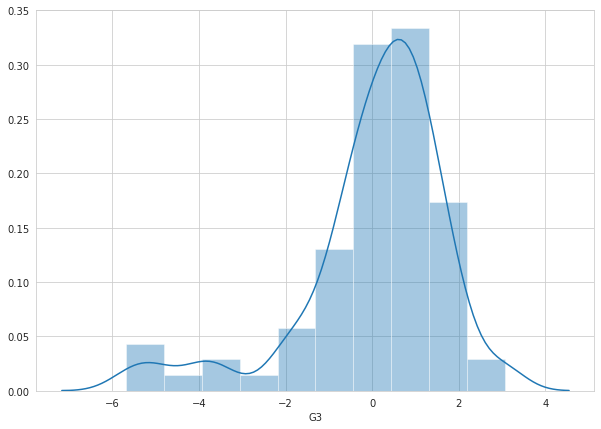

In [0]:
plt.figure(figsize=(10,7))
sns.distplot(residuals,bins=10)

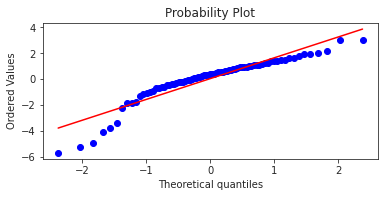

In [0]:
fig, ax = plt.subplots(figsize=(6,2.5))
st.probplot(residuals,plot=ax,fit=True)
plt.show()

In [0]:
st.kstest(residuals,'norm')

KstestResult(statistic=0.17345847285694438, pvalue=0.01505564573298063)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, gradehat))
print('MSE:', metrics.mean_squared_error(y_test, gradehat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gradehat)))
print('R2: ',adj_r2(X,y) )

MAE: 1.2019983280403241
MSE: 2.8190508154173277
RMSE: 1.6790029229924908
R2:  0.827564963953038


Repetiré la regresión múltiple tomando encuenta las variables categóricas que había quitado en un principio para ver como funcionan en el ajuste del modelo.

In [0]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,3,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,2,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,0,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,0,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,1,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [0]:
X = df.drop(columns=['G1','G2','G3'])
y = df['G1']


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [0]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.coef_

array([ 0.15949744,  1.09952611, -0.07291618,  0.11609212,  0.67066615,
       -0.13698   ,  0.18063995,  0.22279031, -0.23927309,  0.23104483,
        0.2404464 ,  0.27676795, -0.29719248,  0.77567329, -1.17162733,
       -1.95214619, -0.7692502 , -0.00840978, -0.15479126,  0.23423683,
        1.08249138,  0.57220585, -0.28406285,  0.00342025,  0.24975442,
       -0.41720147,  0.02878715, -0.22147863, -0.07046598, -0.00381481])

In [0]:
reg.intercept_

9.832990754758294

In [0]:
reg.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [0]:
coefficients=pd.DataFrame(index=X.columns, data=reg.coef_.T, columns=["Coef."])
coefficients

,Coef.
school,-0.406877
sex,0.955694
age,0.015443
address,0.121462
famsize,0.569446
Pstatus,-0.075135
Medu,0.090334
Fedu,0.238793
Mjob,-0.198404
Fjob,0.260530


In [0]:
grade1hat= reg.predict(X_test)
residuals = y_test - grade1hat

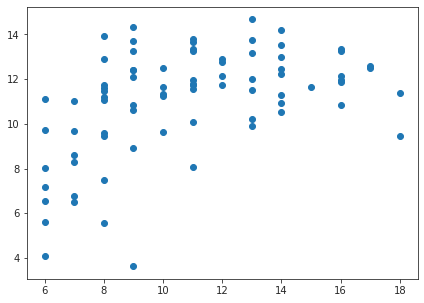

In [0]:
plt.figure(figsize=(7,5))
plt.scatter(y_test,grade1hat)

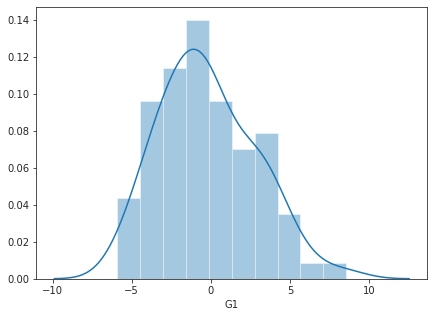

In [0]:
plt.figure(figsize=(7,5))
sns.distplot(residuals,bins=10)

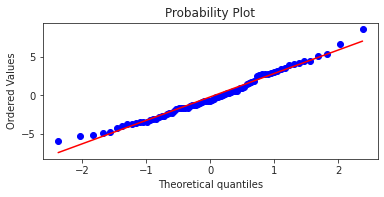

In [0]:
fig, ax = plt.subplots(figsize=(6,2.5))
st.probplot(residuals,plot=ax,fit=True)
plt.show()

In [0]:
st.kstest(residuals,'norm')

KstestResult(statistic=0.3110345305163457, pvalue=2.74904464238614e-07)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, grade1hat))
print('MSE:', metrics.mean_squared_error(y_test, grade1hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grade1hat)))
print('R2: ',adj_r2(X,y) )

MAE: 2.4459285663238255
MSE: 8.973564050691406
RMSE: 2.995590768227764
R2:  0.26385044396322554


In [0]:
grade1hat= reg.predict(X_test)
residuals = y_test - grade1hat
prediccionesG1 = pd.DataFrame({"Real": y_test, "Predicción":grade1hat, "Diferencia": residuals})
prediccionesG1


,Real,Predicción,Diferencia
211,12,9.912871,2.087129
122,13,10.347998,2.652002
249,13,11.298547,1.701453
160,7,8.833030,-1.833030
142,9,11.598592,-2.598592
...,...,...,...
118,9,8.228807,0.771193
200,16,10.055605,5.944395
223,12,9.841186,2.158814
198,18,8.593847,9.406153


El ajuste anterior resulta ser una herramienta útil para predecir la calificación del primer parcial de un joven tomando encuenta todas las variables económicas y sociales con las que contamos en el presente estudio, pero cada una de ellas por separado no nos dan suficiente información de como influyen en su desempeño. Con lo anterior podemos concluír que según las características de un alumno si es posible prevenir que los cursos de Matemáticas se reprueben dando un seguimiento oportuno.

In [0]:
#Ahora voy a repetir el proceso estandarizando las variables para minimizar el efecto de los outliers y alumnos dados de baja.

In [0]:
data= df.copy()
data.loc[ data['G1']>0 ]
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,3,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,2,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,0,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,0,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,1,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


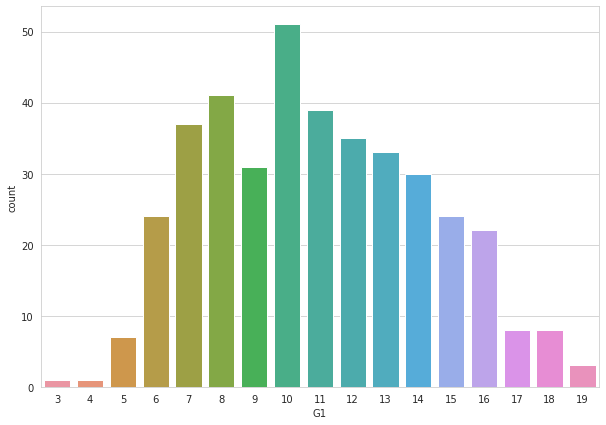

In [0]:
plt.figure(figsize=(10,7))
sns.countplot(data.G1)
plt.show()

In [0]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled


array([[-0.3630498 , -0.94817639,  1.02304645, ..., -1.00378921,
        -0.39928949,  0.03642446],
       [-0.3630498 , -0.94817639,  0.23837976, ..., -1.00378921,
        -0.39928949, -0.21379577],
       [-0.3630498 , -0.94817639, -1.33095364, ...,  0.55109996,
        -0.39928949,  0.53686493],
       ...,
       [ 2.75444305,  1.05465609,  3.37704655, ...,  0.55109996,
        -0.39928949, -0.33890588],
       [ 2.75444305,  1.05465609,  1.02304645, ...,  1.32854454,
         1.04106985, -0.71423623],
       [ 2.75444305,  1.05465609,  1.80771315, ...,  0.55109996,
         1.04106985, -0.08868565]])

In [0]:
X = data.drop(columns=['G1','G2','G3'])
y = data['G1']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [0]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.coef_

array([-0.21769736,  0.46389822,  0.11586906,  0.11039663,  0.1558356 ,
       -0.08346083,  0.09898918,  0.27899711, -0.05539303,  0.21928343,
        0.32467602, -0.06275511, -0.11361897,  0.32425011, -0.9824535 ,
       -0.6676287 , -0.36442155, -0.1436249 , -0.07011901, -0.07350644,
        0.3352228 ,  0.12148351, -0.15434904,  0.02137296,  0.34807838,
       -0.37731727, -0.16022508,  0.01756675, -0.02098307, -0.02610993])

In [0]:
reg.intercept_

10.862831985812516

In [0]:
reg.score(X_train,y_train)

0.2645616711765807

In [0]:
adj_r2(X_train,y_train)

0.18714711024779973

In [0]:
g1hat = reg.predict(X_test)
residuals = y_test - g1hat

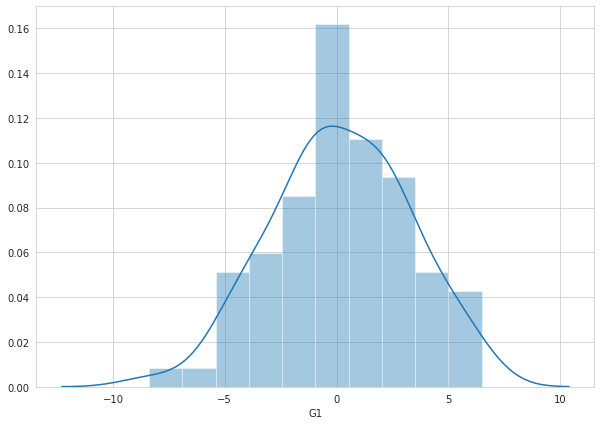

In [0]:
plt.figure(figsize=(10,7))
sns.distplot(residuals,bins=10)

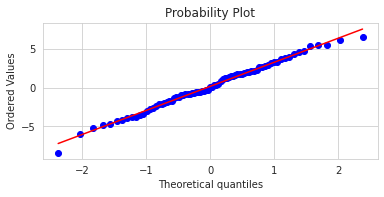

In [0]:
fig, ax = plt.subplots(figsize=(6,2.5))
st.probplot(residuals,plot=ax,fit=True)
plt.show()

In [0]:
residuals.mean()

0.1812598069904636

In [0]:
st.kstest(residuals,'norm')

KstestResult(statistic=0.316110249074383, pvalue=1.619818758583933e-07)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, g1hat))
print('MSE:', metrics.mean_squared_error(y_test, g1hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, g1hat)))
print("R2: ", metrics.r2_score(y_test, g1hat))

MAE: 2.4778476553428446
MSE: 9.294137034434694
RMSE: 3.0486287137719303
R2:  0.241788329299797


In [0]:
coefficients = pd.DataFrame(index=X.columns,data=reg.coef_.T,columns=['Coef.'])
coefficients

,Coef.
school,-0.024317
sex,0.487429
age,0.004693
address,-0.057853
famsize,0.239102
Pstatus,-0.007161
Medu,0.251217
Fedu,0.269089
Mjob,-0.259737
Fjob,0.177151


In [0]:
newprediccionesG1 = pd.DataFrame({"Real": y_test, "Predicción":g1hat, "Diferencia": residuals})
newprediccionesG1


,Real,Predicción,Diferencia
211,12,5.612021,2.087129
122,13,10.835387,2.652002
249,13,9.535309,1.701453
160,7,11.425379,-1.833030
142,9,11.604307,-2.598592
...,...,...,...
118,9,10.917062,0.771193
200,16,10.695542,5.944395
223,12,11.380195,2.158814
198,18,12.360099,9.406153


Es malo el ajuste con respecto al anterior . Solamente voy a quitar a alumnos dados de baja, pero no voy a estandarizar variables

In [0]:
data= df.copy()
data.loc[ data['G1']>0 ]
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,3,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,2,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,0,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,0,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,1,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [0]:
X = data.drop(columns=['G1','G2','G3'])
y = data['G1']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [0]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.coef_

array([ 1.54245827e-02,  5.82275494e-01,  7.48526677e-02,  1.51650275e-01,
        2.30513845e-01,  1.14230814e-01,  4.47101619e-04,  4.18159422e-01,
       -3.00974010e-01,  1.74608105e-01,  3.02620881e-01,  4.76406556e-02,
        6.99805128e-03,  5.03462092e-01, -8.66555195e-01, -6.31111884e-01,
       -2.27286496e-01, -1.88697764e-01, -1.45720147e-01,  1.50533035e-01,
        2.99446221e-01,  1.13803848e-01, -3.14348073e-02,  5.11153351e-02,
        4.89476732e-02, -4.42239435e-01, -1.19829984e-01, -4.50108900e-02,
       -2.57065475e-01,  2.22568908e-01])

In [0]:
reg.intercept_

10.88631119645731

In [0]:
reg.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [0]:
adj_r2(X_train,y_train)

0.1950926850501109

In [0]:
g1hatNE = reg.predict(X_test)
residuals = y_test - g1hatNE

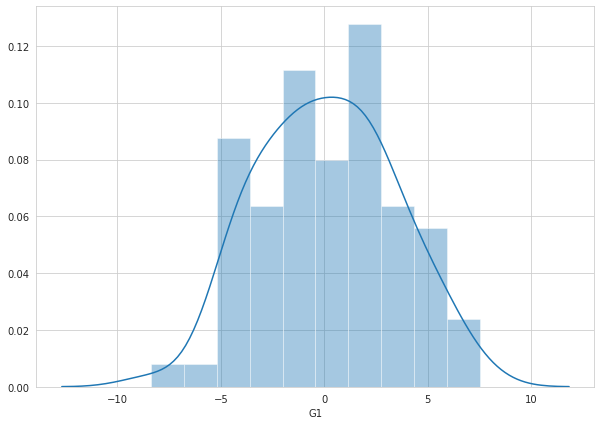

In [0]:
plt.figure(figsize=(10,7))
sns.distplot(residuals,bins=10)

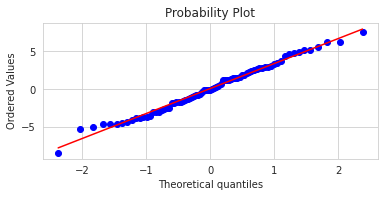

In [0]:
fig, ax = plt.subplots(figsize=(6,2.5))
st.probplot(residuals,plot=ax,fit=True)
plt.show()

In [0]:
residuals.mean()

0.1127478151818042

In [0]:
st.kstest(residuals,'norm')

KstestResult(statistic=0.30968332611702254, pvalue=3.159736470584781e-07)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, g1hatNE))
print('MSE:', metrics.mean_squared_error(y_test, g1hatNE))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, g1hatNE)))
print("R2: ", metrics.r2_score(y_test, g1hatNE))

MAE: 2.678709067176263
MSE: 10.502163472192303
RMSE: 3.2407041630164737
R2:  0.18447179009640202


In [0]:
coefficients = pd.DataFrame(index=X.columns,data=reg.coef_.T,columns=['Coef.'])
coefficients

,Coef.
school,0.015425
sex,0.582275
age,0.074853
address,0.151650
famsize,0.230514
Pstatus,0.114231
Medu,0.000447
Fedu,0.418159
Mjob,-0.300974
Fjob,0.174608


In [0]:
newpredG1 = pd.DataFrame({"Real": y_test, "Predicción":g1hatNE, "Diferiencia": residuals})
newpredG1

,Real,Predicción,Diferiencia
363,16,11.392082,4.607918
178,10,10.759446,-0.759446
32,17,10.798726,6.201274
59,15,10.190248,4.809752
393,11,11.642593,-0.642593
...,...,...,...
369,14,11.150206,2.849794
233,14,12.713346,1.286654
274,10,12.658376,-2.658376
154,11,9.739396,1.260604


No veo una mejora significativa en el poder predictivo del modelo, aumenta ligeramente el error medio pero reduce R2. 
Para terminar el estudio del modelo, a fin de predecir el resultado del primer parcial, es no eliminar los ceros, tambien tomar encuenta a los alumnos que se dan de baja pero si considerando sus condiciones socio económicas y afectivas, ya que esas observaciones nos ayudan a ajustar el modelo.

In [0]:
X = df.drop(columns=['G1','G2','G3'])
y = df['G1']


In [0]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [0]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.coef_

array([-0.01311618,  0.45033459,  0.06172606, -0.00666226,  0.21989213,
       -0.10587598,  0.37361942,  0.21433974, -0.23434422,  0.18346925,
        0.34118463,  0.08714697,  0.05040355,  0.47467582, -0.87181055,
       -0.56125818, -0.66258952, -0.04719272, -0.0142806 ,  0.05617625,
        0.3084203 ,  0.19668106, -0.11567341, -0.08215328,  0.39427869,
       -0.52126824, -0.25577487, -0.20059992, -0.03192387, -0.07605042])

In [0]:
reg.intercept_

10.923809779998562

In [0]:
reg.score(X_train,y_train)

0.3075716520990223

In [0]:
adj_r2(X_train,y_train)

0.23468445758313006

In [0]:
yhat = reg.predict(X_test)
residuals = y_test - yhat

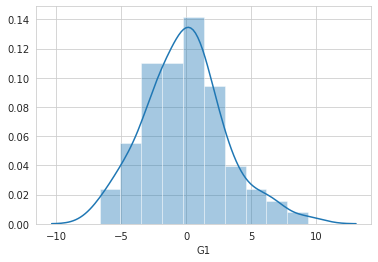

In [0]:
sns.distplot(residuals,bins=10)

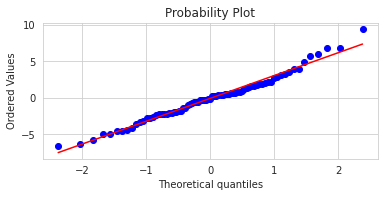

In [0]:
fig, ax = plt.subplots(figsize=(6,2.5))
st.probplot(residuals,plot=ax,fit=True)
plt.show()

In [0]:
residuals.mean()

-0.07474510252446162

In [0]:
st.kstest(residuals,'norm')

KstestResult(statistic=0.28844475907112377, pvalue=2.5863579754993992e-06)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, yhat))
print('MSE:', metrics.mean_squared_error(y_test, yhat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yhat)))

MAE: 2.3631257325714876
MSE: 9.497266379286089
RMSE: 3.081763517742088


In [0]:
metrics.r2_score(y_test, yhat)

0.006362913680606153

In [0]:
coefficients = pd.DataFrame(index=X.columns,data=reg.coef_.T,columns=['Coef.'])
coefficients

,Coef.
school,-0.013116
sex,0.450335
age,0.061726
address,-0.006662
famsize,0.219892
Pstatus,-0.105876
Medu,0.373619
Fedu,0.214340
Mjob,-0.234344
Fjob,0.183469


In [0]:
diferencias= pd.DataFrame({"Real": y_test, "Predicción":yhat, "Diferencia": residuals})
diferencias

,Real,Predicción,Diferencia
211,12,9.912871,2.087129
122,13,10.347998,2.652002
249,13,11.298547,1.701453
160,7,8.833030,-1.833030
142,9,11.598592,-2.598592
...,...,...,...
118,9,8.228807,0.771193
200,16,10.055605,5.944395
223,12,9.841186,2.158814
198,18,8.593847,9.406153


El modelo anterior muestra ser mejor que los otros realizados porque presenta valores de r2 y p bajos, lo que indica que hay una buena correlación con las variables, también puedo concluir que es bueno considerar todos los alumnos incluyendo los que se dan de baja ya que también proporcionan información valiosa para el ajuste. Es un modelo que predice calificaciones más bajas que las que en realidad obtienen los alumnos y es preferible que sea así para evitar confiarse con los posibles resultados y no tomar medidas a tiempo.
Puedo observar que las variables que más influyen en el aprovechamiento de un alumno es el tamaño de la familia, el nivel educativo de los padres, principalmente el de la madre, el tipo de trabajo de la madre en forma de correlación negativa, lo que indica que les va mejor si la madre permanece en la casa. También el timpo de estudio, interés por continuar estudiando y de manera de correlación negativa, de forma sorprendente, el que la familia o el alumno tenga apoyo económico, pienso que porque ello obedece a personas de escasos recursos y ello tiende a afectar el desempeño de los jóvenes.
